In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [4]:
ft = 10000
local_path = f'/storage/shared/oceanparcels/output_data/data_Claudio/hc13_2/hc13_0_big.zarr'

In [19]:
sim = xr.open_zarr(local_path)
sim = sim.where(sim.radius < 1e-6/2, drop=False)

depths = sim['z'].values

k1, k2 = np.where(depths < 300)
idx_particles, idx_k2 = np.unique(k1, return_index=True)
surface_time = k2[idx_k2]


In [20]:
idx_particles

array([ 343,  584, 3114, 3358, 7502])

In [21]:
sim 

<xarray.Dataset>
Dimensions:           (trajectory: 8192, obs: 62500)
Coordinates:
  * obs               (obs) int32 0 1 2 3 4 5 ... 62495 62496 62497 62498 62499
  * trajectory        (trajectory) int64 0 1 2 3 4 ... 8187 8188 8189 8190 8191
Data variables: (12/19)
    abs_salinity      (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    bottom            (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    cons_temperature  (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    density           (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    distance          (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    floored           (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    ...                ...
    u                 (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    v                 (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    v_s               (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    w                 (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    z                 (trajectory, obs) float64 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    z_kz              (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.4.1-46-g28f231fa

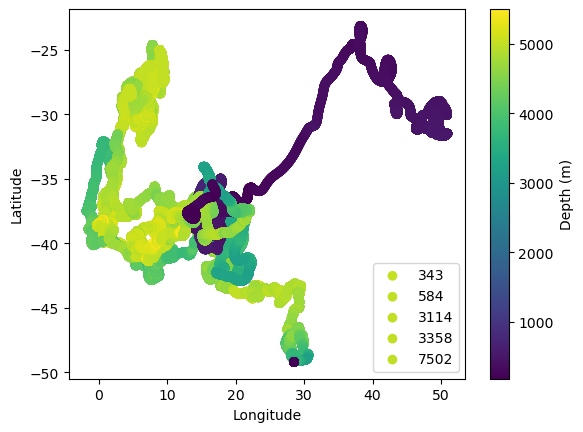

In [22]:
for i in idx_particles:
    im = plt.scatter(sim['lon'][i, :], 
             sim['lat'][i, :], c=sim['z'][i, :], label=i)
    
plt.colorbar(im, label='Depth (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

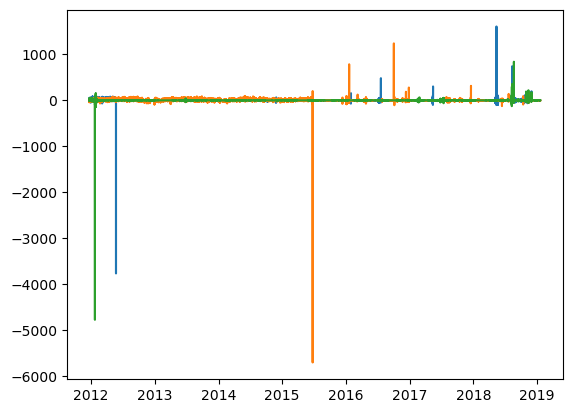

In [12]:
for i in idx_particles:
    plt.plot(sim['time'][i, :], sim['z_kz'][i, :], label=i)

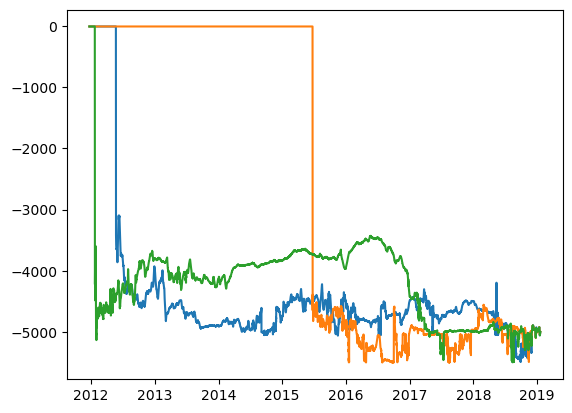

In [13]:
for i in idx_particles:
    plt.plot(sim['time'][i, :], -sim['z'][i, :], label=i)
    

Text(0, 0.5, 'z particles (m)')

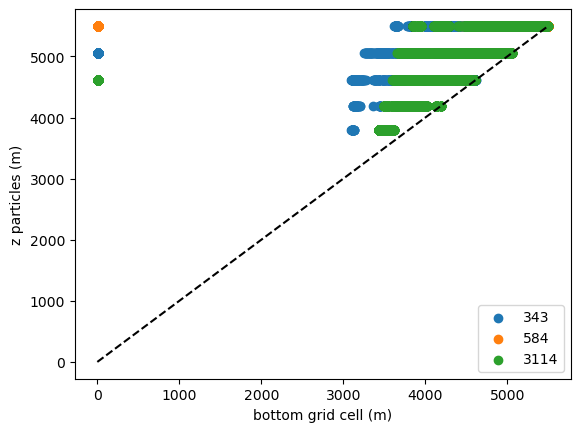

In [14]:
for i in idx_particles:
    plt.scatter(sim['z'][i, :], sim['bottom'][i, :], label=i)
    
plt.plot(range(0, 5500), range(0, 5500), 'k--')

plt.legend()
plt.xlabel('bottom grid cell (m)')
plt.ylabel('z particles (m)')

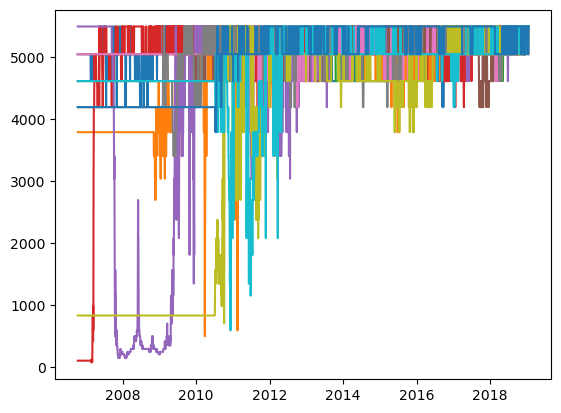

In [63]:
for i in idx_particles:
    plt.plot(sim['time'][i, :], sim['bottom'][i, :], label=i)
    
# plt.semilogy()

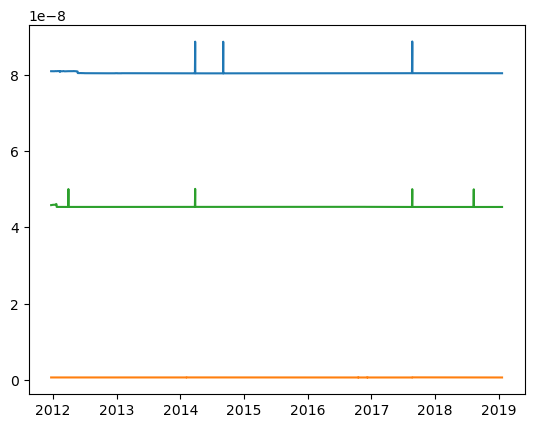

In [15]:
for i in idx_particles:
    plt.plot(sim['time'][i, :], sim['v_s'][i, :], label=i)
    

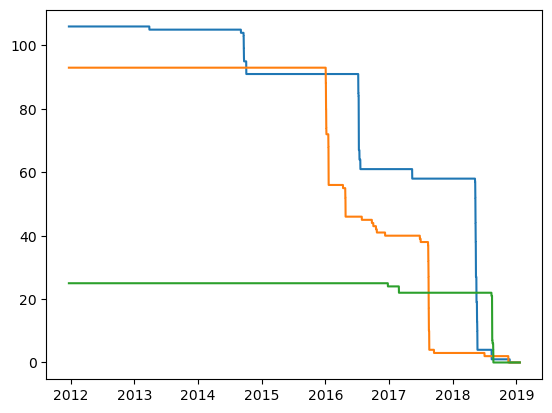

In [16]:
for i in idx_particles:
    plt.plot(sim['time'][i, :], abs(sim['floored'][i, :]), label=i)
    
# plt.semilogy()
    